<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl
from scipy.stats import pearsonr
from sklearn import preprocessing

Загрузить датасет по url:


In [134]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Распределение похоже на равномерное

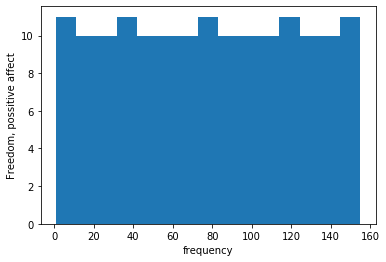

In [80]:
n, bins, pathces = plt.hist(df['Freedom'], 15, cumulative=False)
plt.xlabel('frequency')
plt.ylabel('Freedom, possitive affect')

plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [158]:
fr = df[ df['Freedom'].isnull() == False]['Freedom']
df[ df['Freedom'].isnull() == True]['Freedom'] #выброс
#Распределение похоже на равномерное, поэтому выбросов нет (за исключением NaN)

28   NaN
Name: Freedom, dtype: float64

In [150]:
print('медиана', statistics.median(fr))

медиана 78.0


In [151]:
print('среднее', statistics.pvariance(fr))

среднее 78.0


In [152]:
print('ср кв отклонение', statistics.pvariance(fr)**(1/2))

ср кв отклонение 44.74371464239419


In [153]:
print('дисперсия', statistics.pvariance(fr))

дисперсия 2002.0


In [154]:
print('минимум', min(fr))

минимум 1.0


In [155]:
print('максимум', max(fr))

максимум 155.0


In [156]:
print('Размах', max(fr)-min(fr))

Размах 154.0


Почему нельзя найти моду?

In [157]:
#распределение равномерное, в нем нет наиболее часто повторяющегося значения 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

0.6817698430601657

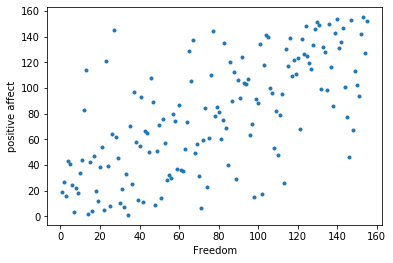

In [104]:
pa = df[ df['Positive affect'].isnull() == False]['Positive affect']
plt.xlabel('Freedom')
plt.ylabel('positive affect')
plt.scatter(fr, pa, marker='.', ) #на вид относительно сильная прямая
corr, p_value = pearsonr(fr,pa)
corr #прямая связь

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [110]:
fr1 = ((fr-statistics.mean(fr)))
minmaxscaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
fr2 = minmaxscaler.fit_transform(np.array(fr1).reshape(-1, 1))

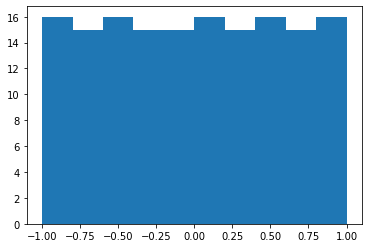

In [112]:
plt.hist(fr2)
plt.show()

Построить матрицу корреляций для всех колонок таблицы

In [135]:
df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


Загрузить таблицу цен на авокадо: 

In [139]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
dff=pd.read_csv('avocado.csv')
dff[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

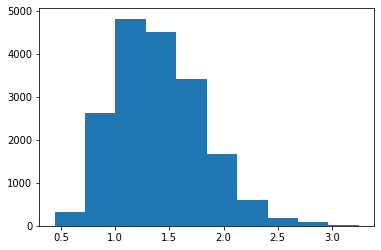

In [140]:
ap = dff.AveragePrice 
plt.hist(ap)
plt.show()
#похоже на нормальное 


Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [142]:
pearsonr(ap, dff['4046'])[0], pearsonr(ap, dff['4225'])[0], pearsonr(ap, dff['4770'])[0]

(-0.2083170484878848, -0.17292777250933541, -0.1794459839797562)

Немного не понимаю,что означают столбцы, но связь с average price почти отсутствует